In [1]:
import torch
from diffusers import DiffusionPipeline, LCMScheduler


model_path = "./models"


pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    variant="fp16",
    torch_dtype=torch.float16, use_safetensors=True,
)
# set scheduler


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
# load LoRAs
pipe.from_single_file("./models/dynavisionXLAllInOneStylized_release0557Bakedvae.safetensors", adapter_name="dyna")

# Combine LoRAs
pipe.set_adapters(["dyna"], adapter_weights=[1.0])
pipe.to("cuda")

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.23.0",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "force_zeros_for_empty_prompt": true,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/15 [00:00<?, ?it/s]

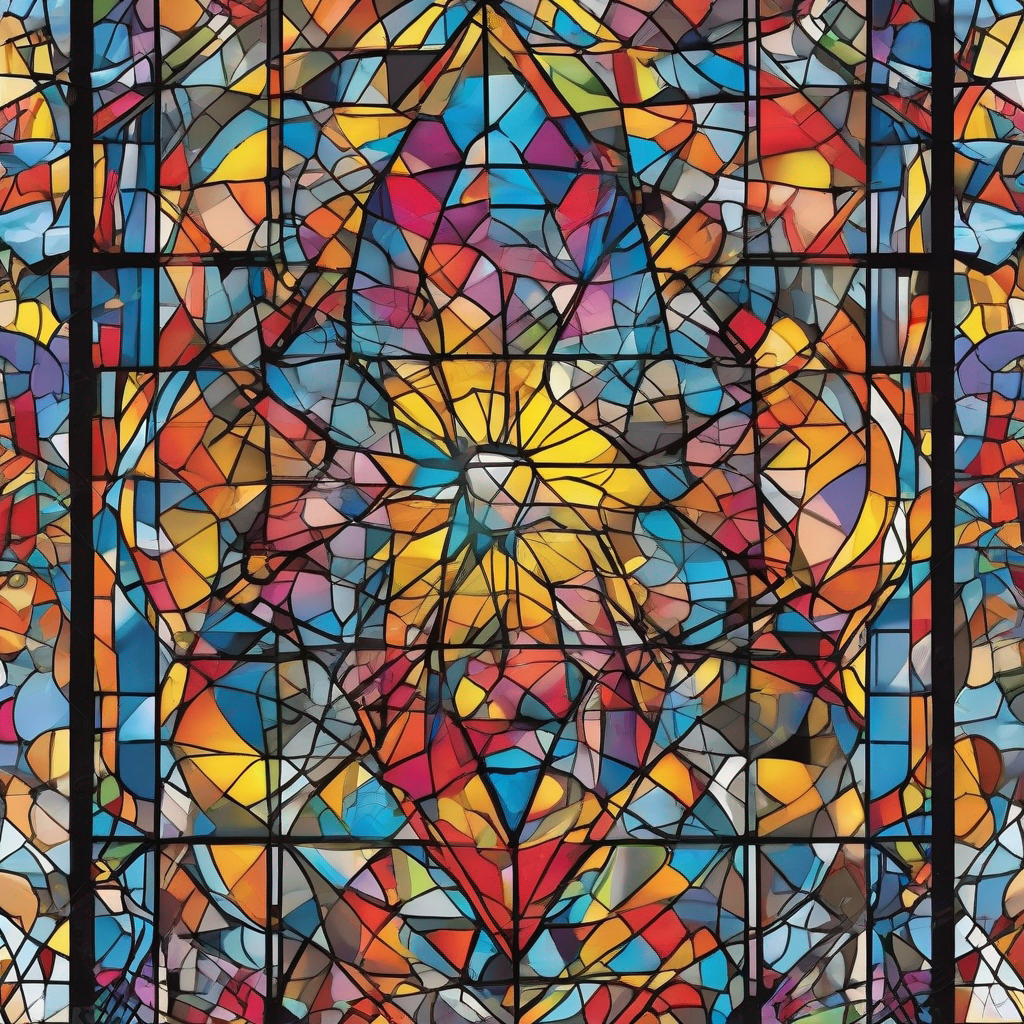

In [6]:
prompt = "(stained glass art stylized by Romero Britto, professional, Gamma-ray burst background, split diopter, Hopeful, Goth Art, dra"
neg_prompt = "poor quality, blurry"
image = pipe(prompt, negative_prompt=neg_prompt, num_inference_steps=15, guidance_scale=5).images[0]
image